## Objectif du projet: distinguer le miel pur du miel adultéré
- Spectroscopie: l’interaction de la lumière avec les matériaux.

**Imagerie hyperspectrale pour la détection de la fraude alimentaire:**


• Détermination de la composition chimique: les différents matériaux
ont des signatures spectrales uniques, ce qui permet d’identifier les
substances.

• Indication de concentration : en analysant la variation de l’intensité
lumineuse à différentes longueurs d’onde, l’imagerie hyperspectrale
peut fournir des indications sur la concentration des composants
chimiques.

On utilise l’imagerie hyperspectrale et les techniques
d’apprentissage automatique pour détecter l’adultération du miel
avec du sucre à différentes concentrations (5%, 10%, 25%, 50%).

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#chargement des données
df=pd.read_csv("adulteration_dataset_26_08_2021.csv")

In [3]:
#Exploration des données
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C1,2,50,50.0,1.029176,1.056051,1.038291,1.034530,0.999627,0.912370,...,0.348729,0.351380,0.355957,0.365170,0.382118,0.393492,0.410689,0.436481,0.454846,Clover
1,C1,2,50,50.0,1.053778,1.070452,1.054946,1.033672,1.017340,0.900341,...,0.360863,0.365784,0.365818,0.378203,0.391223,0.409595,0.427099,0.440755,0.467418,Clover
2,C1,2,50,50.0,1.088773,1.042955,1.091762,1.024891,1.017998,0.909208,...,0.359893,0.365922,0.369344,0.380716,0.390350,0.405218,0.429270,0.450195,0.470935,Clover
3,C1,2,50,50.0,1.040980,1.050815,1.041357,1.032640,1.000945,0.892702,...,0.375256,0.374532,0.385654,0.390755,0.407553,0.424365,0.438788,0.458487,0.493396,Clover
4,C1,2,50,50.0,1.114777,1.039309,1.036861,1.014923,0.965831,0.917315,...,0.360017,0.361234,0.372401,0.377788,0.392066,0.405991,0.422643,0.448330,0.472570,Clover


In [4]:
df.columns

Index(['Brand', 'Acquisition', 'Concentration_Class', 'Concentration',
       '399.40nm', '404.39nm', '409.38nm', '414.37nm', '419.37nm', '424.38nm',
       ...
       '1020.10nm', '1025.55nm', '1031.00nm', '1036.46nm', '1041.92nm',
       '1047.38nm', '1052.85nm', '1058.32nm', '1063.79nm', 'Class'],
      dtype='object', length=133)

In [6]:
# Extraction des colonnes 4 à 132 contenant les données spectrales
wavelengths = df.columns[4:133]


In [7]:
df.shape

(8675, 133)

In [8]:
df['Concentration_Class'].value_counts()

,count
Concentration_Class,
5,1950
50,1925
10,1800
25,1800
0,1050
100,150


## Affichage des spectres moyens par concentration d'adultération


In [11]:
wavelengths=df.columns[4:132]

In [12]:
wavelengths

Index(['399.40nm', '404.39nm', '409.38nm', '414.37nm', '419.37nm', '424.38nm',
       '429.38nm', '434.40nm', '439.41nm', '444.43nm',
       ...
       '1014.66nm', '1020.10nm', '1025.55nm', '1031.00nm', '1036.46nm',
       '1041.92nm', '1047.38nm', '1052.85nm', '1058.32nm', '1063.79nm'],
      dtype='object', length=128)

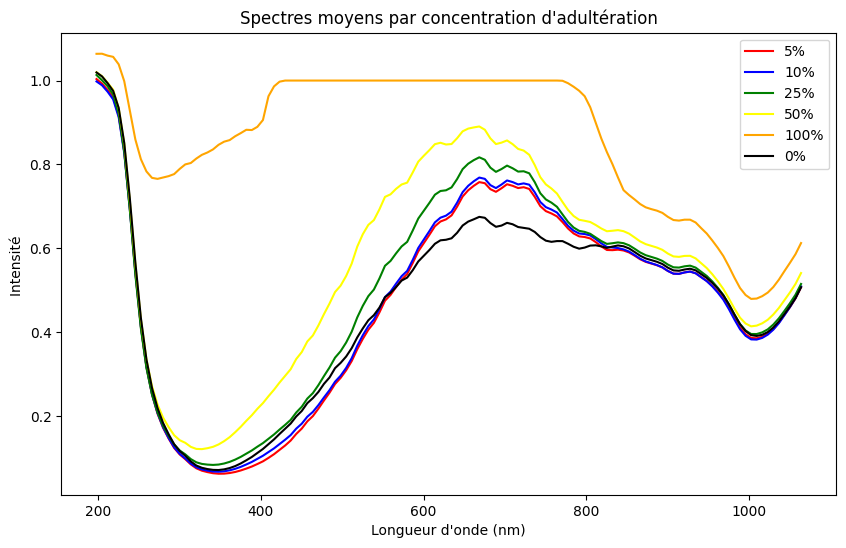

In [15]:
from matplotlib import colormaps
x=np.linspace(198,1064,128)
y1=df[df['Concentration_Class']==5].values[:, 4:132].mean(axis=0)
y2=df[df['Concentration_Class']==10].values[:, 4:132].mean(axis=0)
y3=df[df['Concentration_Class']==25].values[:, 4:132].mean(axis=0)
y4=df[df['Concentration_Class']==50].values[:, 4:132].mean(axis=0)
y5=df[df['Concentration_Class']==100].values[:, 4:132].mean(axis=0)
y6=df[df['Concentration_Class']==0].values[:, 4:132].mean(axis=0)
plt.figure(figsize=(10,6))
plt.plot(x,y1,label='5%',color='red')
plt.plot(x,y2,label='10%',color='blue')
plt.plot(x,y3,label='25%',color='green')
plt.plot(x,y4,label='50%',color='yellow')
plt.plot(x,y5,label='100%',color='orange')
plt.plot(x,y6,label='0%',color='black')
plt.xlabel('Longueur d\'onde (nm)')
plt.ylabel('Intensité ')
plt.title('Spectres moyens par concentration d\'adultération')
plt.legend()
plt.show()

In [16]:
#Ajout d'un attribut Pur 1: 0 non Pur
df['Pur']=df['Concentration_Class'].apply(lambda x: 1 if x==0 else 0)
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class,Pur
0,C1,2,50,50.0,1.029176,1.056051,1.038291,1.034530,0.999627,0.912370,...,0.351380,0.355957,0.365170,0.382118,0.393492,0.410689,0.436481,0.454846,Clover,0
1,C1,2,50,50.0,1.053778,1.070452,1.054946,1.033672,1.017340,0.900341,...,0.365784,0.365818,0.378203,0.391223,0.409595,0.427099,0.440755,0.467418,Clover,0
2,C1,2,50,50.0,1.088773,1.042955,1.091762,1.024891,1.017998,0.909208,...,0.365922,0.369344,0.380716,0.390350,0.405218,0.429270,0.450195,0.470935,Clover,0
3,C1,2,50,50.0,1.040980,1.050815,1.041357,1.032640,1.000945,0.892702,...,0.374532,0.385654,0.390755,0.407553,0.424365,0.438788,0.458487,0.493396,Clover,0
4,C1,2,50,50.0,1.114777,1.039309,1.036861,1.014923,0.965831,0.917315,...,0.361234,0.372401,0.377788,0.392066,0.405991,0.422643,0.448330,0.472570,Clover,0


In [17]:
#Définition de X et y
y=df['Pur'].values #il faut que ca soit ndarray
X=df[wavelengths].values

In [18]:
#Verification du type de y
y

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
#Division des données en train_data, test_data, train_labels et test_labels
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Normalisation
import tensorflow as tf
train_data=train_data.astype(float)
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [21]:
#Division en données normales/anormales
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
anomalous_train_data = train_data[~train_labels] #la négation, selection là ou on  un 0 (faux)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(128, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [24]:
#Méthode 2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.saving import register_keras_serializable
@register_keras_serializable()
class AnomalyDetector(Model):
  def __init__(self,**kwargs):
    super(AnomalyDetector, self).__init__(**kwargs)
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(110, activation="relu"),
      layers.Dense(92, activation="relu"),
      layers.Dense(74, activation="relu"),
      layers.Dense(65, activation="relu"),
      layers.Dense(56, activation="relu"),
      layers.Dense(40, activation="relu"),
      layers.Dense(30, activation="relu"),
      layers.Dense(20, activation="relu")])

    self.decoder = tf.keras.Sequential([

      layers.Dense(30, activation="relu"),
      layers.Dense(40, activation="relu"),
      layers.Dense(56, activation="relu"),
      layers.Dense(65, activation="relu"),
      layers.Dense(74, activation="relu"),
      layers.Dense(92, activation="relu"),
      layers.Dense(110, activation="relu"),
      layers.Dense(128, activation="sigmoid"),
      layers.Dense(128, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


autoencoder = AnomalyDetector()

In [25]:
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mae')

In [26]:
history= autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=32,
          validation_split= 0.1,
          shuffle=True)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1634 - val_loss: 0.0683
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0636 - val_loss: 0.0483
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0496 - val_loss: 0.0382
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0383 - val_loss: 0.0301
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0301 - val_loss: 0.0262
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0255 - val_loss: 0.0225
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216 - val_loss: 0.0212
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0211 - val_loss: 0.0202
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - val_loss: 0.0195
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0196 - val_loss: 0.0200
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0195 - val_loss: 0.0196
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - va

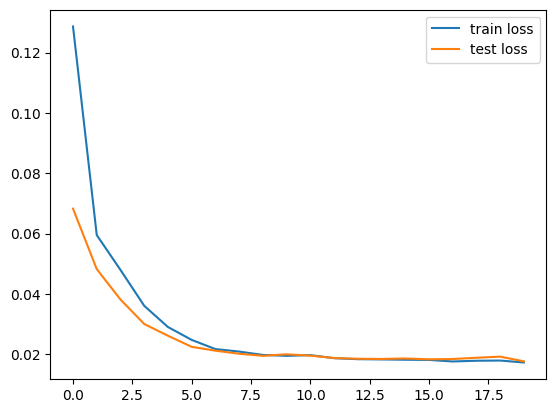

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [28]:
#Affichage des cours Loss du train et du test sets
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))

In [29]:
#calcul du seuil de reconstruction sur les données normal_train_data
#Méthode 1: Reconstruction
Result1=autoencoder.predict(normal_train_data)
#keras MAE
train_mae_loss = tf.keras.losses.mae(normal_train_data, Result1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
#Méthode 2
ET=autoencoder.encoder(normal_train_data)
Result2=autoencoder.decoder(ET)
#Méthode 3
Res3= autoencoder(normal_train_data)
Res3

<tf.Tensor: shape=(838, 128), dtype=float32, numpy=
array([[0.85084987, 0.84845024, 0.826724  , ..., 0.39439678, 0.40567204,
        0.4308563 ],
       [0.8774009 , 0.8812531 , 0.86708933, ..., 0.4012601 , 0.4240581 ,
        0.4424487 ],
       [0.87456733, 0.8672413 , 0.86012304, ..., 0.3680168 , 0.385675  ,
        0.41400337],
       ...,
       [0.85303515, 0.8512776 , 0.8294227 , ..., 0.3952689 , 0.40639207,
        0.4315406 ],
       [0.8348296 , 0.82498604, 0.8159032 , ..., 0.38960397, 0.40592575,
        0.42279676],
       [0.89129573, 0.891924  , 0.8822259 , ..., 0.40104526, 0.4361892 ,
        0.45668843]], dtype=float32)>

In [30]:
threshold  = np.mean(train_mae_loss) + np.std(train_mae_loss)

In [32]:
print(threshold)

0.027874112


In [ ]:
"""
#calcul du seuil de reconstruction sur les données normal_train_data
#Méthode 1: Reconstruction
Result=autoencoder.predict(train_data)
#keras MAE
train_mae_loss = tf.keras.losses.mae(train_data, Result)
threshold  = np.mean(train_mae_loss) + np.std(train_mae_loss)
print(threshold) """

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
0.09533363


In [33]:
#def predict(model, data, threshold):
def predict(model, data, threshold):
  reconstructions=model(data)
  loss=tf.keras.losses.mae(reconstructions,data)
  return tf.math.less(loss,threshold) #ou bien return loss < threshold

In [34]:
predict(autoencoder, train_data,threshold)

<tf.Tensor: shape=(6940,), dtype=bool, numpy=array([False, False, False, ..., False, False,  True])>

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("F1 Score = {}".format(f1_score(labels, predictions)))



In [36]:
#Prédiction sur les données d'entrainement
preds = predict(autoencoder, train_data, threshold)
print_stats(preds, train_labels)

Accuracy = 0.7340057636887608
Precision = 0.29052369077306733
Recall = 0.834128878281623
F1 Score = 0.4309494451294698


In [37]:
##Prédiction sur les données de test

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.7273775216138328
Precision = 0.2884927066450567
Recall = 0.839622641509434
F1 Score = 0.4294330518697226


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


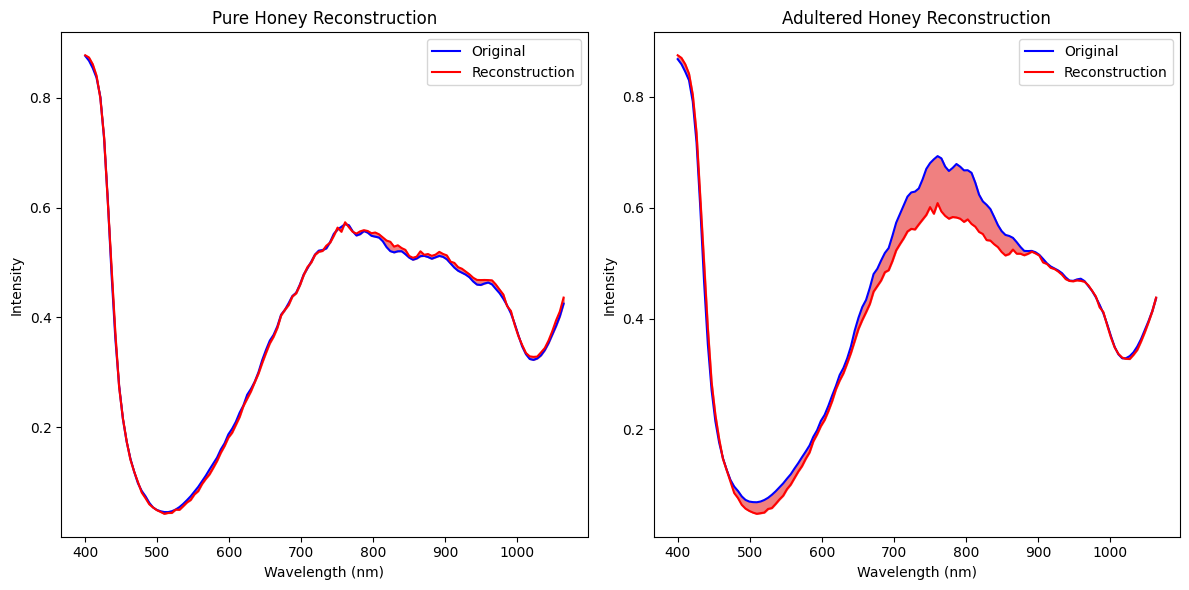

In [48]:
#Affichez les courbes de reconstruction des données de test - miel pur ainsi que miel adultéré
#Montrez l'erreur de reconstructions
x=np.linspace(400,1064,128)

normal_test_data = test_data[test_labels]
anomalous_test_data = test_data[~test_labels]

recontruction_normal=autoencoder.predict(normal_test_data)
recontruction_anomalous=autoencoder.predict(anomalous_test_data)

y1=np.mean(normal_test_data[:,:132], axis=0)
y2=np.mean(recontruction_normal[:,:132], axis=0)

# Une seule figure contenant les 2 courbes
plt.figure(figsize=(12, 6))

# Subplot 1: Pure Honey Reconstruction
plt.subplot(1, 2, 1)
plt.plot(x, y1, label='Original', color='blue')
plt.plot(x, y2, label='Reconstruction', color='red')
plt.fill_between(x, y2, y1, color='lightcoral')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Pure Honey Reconstruction')
plt.legend()

# Subplot 2: Adulterated Honey Reconstruction
y3=np.mean(anomalous_test_data[:,:132], axis=0)
y4=np.mean(recontruction_anomalous[:,:132], axis=0)

plt.subplot(1, 2, 2)
plt.plot(x, y3, label='Original', color='blue')
plt.plot(x, y4, label='Reconstruction', color='red')
plt.fill_between(x, y4, y3, color='lightcoral')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Adultered Honey Reconstruction')
plt.legend()

#Afficher les courbes
plt.tight_layout()
plt.show()

- Les courbes original et de reconstruction pour le miel pur sont presque confondues, ce qui indique que l'auto-encodeur a bien appris à reconstruire les données normales (miel pur). En revanche, pour le miel adultéré, on observe un décalage significatif entre la courbe originale et la courbe de reconstruction.

Ce décalage représente l'erreur de reconstruction, qui est plus élevée pour les données anormales (miel adultéré) que pour les données normales (miel pur).


L'auto-encodeur est entraîné sur les données normales (miel pur) afin qu'il apprenne à reconstruire ces données avec une erreur minimale.

Lors de la prédiction, si l'erreur de reconstruction d'un échantillon est inférieure à un certain seuil, l'échantillon est classé comme normal (miel pur). Si l'erreur de reconstruction est supérieure au seuil, l'échantillon est classé comme anormal (miel adultéré).